In [360]:
import pandas as pd

df = pd.read_csv('yaya/image_user_data.csv')

df['image'] = df['image'].str.replace('man', 'stranger_3')

def determine_actual_number(image_name):
    if 'stranger' in image_name:
        if image_name.count('stranger') >= 2 or 'cropped' in image_name:
            return 5
        elif 'stranger_' in image_name:
            parts = image_name.split('_')
            if len(parts) >= 4:
                if parts[parts.index('stranger') + 2] == '0.25.png':
                    return 4
                elif parts[parts.index('stranger') + 2] == '0.75.png':
                    return 4
                elif '0.5.png' in image_name and image_name.count('stranger') == 1:
                    return 3
    elif 'cropped' in image_name:
        return 1
    return 2

df['actual number'] = df['image'].apply(determine_actual_number)
df.head(50)

,image,user_number,actual number
0,0_black_image.png,2,2
1,10_black_image.png,2,2
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4
6,14_morphed_image_zohar_abby_0.25.png,3,2
7,15_morphed_image_stranger_2_stranger_3_0.25.png,5,5
8,16_morphed_image_fei_stranger_3_0.25.png,2,4
9,17_morphed_image_yuna_zohar_0.5.png,3,2


In [361]:
df = df[~df['image'].str.contains('black')]
len(df)

75

In [362]:
df['actual number'].value_counts()

2    35
3    13
4    13
5     9
1     5
Name: actual number, dtype: int64

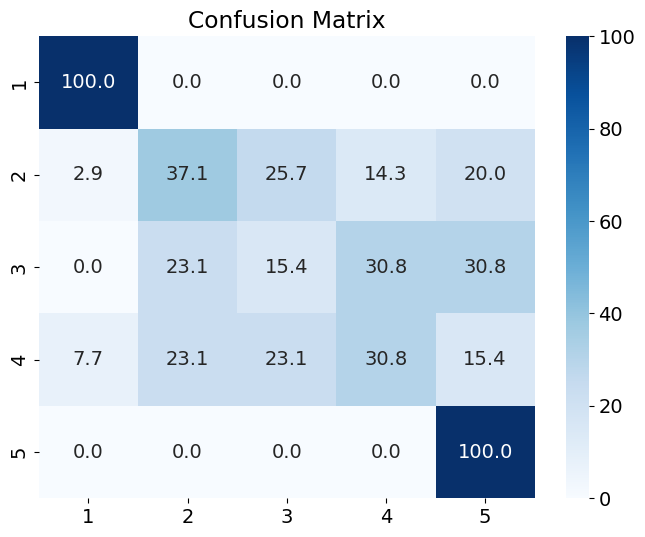

In [363]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

true_labels = df['actual number']
predicted_labels = df['user_number']

cm = confusion_matrix(true_labels, predicted_labels)

cm_norm = normalize(cm, axis=1, norm='l1') * 100
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt='.1f', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.title('Confusion Matrix')
plt.show()

In [364]:
freq_data  = (
    ("yuna", 'frequent'),
    ("annmarie", 'frequent'),
    ("zohar", "sometimes"),
    ("abby", "rare"),
    ("fei", "rare"),
    ("stranger_1", "stranger"),
    ("stranger_2", "stranger"),
    ("stranger_3", "stranger"),
)

avg_deviation_dict = {}

for name, freq in freq_data:
    filtered_df = df[df['image'].str.contains(name) & ~df['image'].str.contains('cropped')]
    filtered_df = filtered_df[~filtered_df['image'].str.contains('stranger.*stranger')]
    
    deviation = abs(filtered_df['user_number'] - filtered_df['actual number'])
    
    filtered_df['deviation'] = deviation
    
    avg_deviation = deviation.mean()
    
    avg_deviation_dict[(name, freq)] = avg_deviation

freq_data_with_avg_deviation = [(name, freq, avg_deviation_dict[(name, freq)]) for name, freq in freq_data]

freq_data_with_avg_deviation

[('yuna', 'frequent', 0.95),
 ('annmarie', 'frequent', 0.9411764705882353),
 ('zohar', 'sometimes', 1.125),
 ('abby', 'rare', 1.375),
 ('fei', 'rare', 1.0588235294117647),
 ('stranger_1', 'stranger', 1.0),
 ('stranger_2', 'stranger', 1.6666666666666667),
 ('stranger_3', 'stranger', 1.2)]

In [365]:
filtered_df.deviation.value_counts()

1    9
2    3
0    2
3    1
Name: deviation, dtype: int64

In [1]:
import glob
import os

def translate2ScreenX(xcoord):
    return 2*xcoord - 1

def translate2ScreenY(ycoord):
    return -2*ycoord + 1

def set_color(freq_label):
    if freq_label == 'frequent':
        return 'green'
    elif freq_label == 'sometimes':
        return 'orange'
    elif freq_label == 'rare':
        return 'red'
    else:
        return 'gray'

def plot_coordinates(dataframe, column_name="right_gaze_point_on_display_area", color="blue"):
    
    # extract x and y coordinates from the specified column
    coords_str = dataframe[column_name].apply(eval)  # Convert strings to tuples
    x_values = [float(point[0]) for point in coords_str]
    y_values = [float(point[1]) for point in coords_str]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    
    # plot the coordinates
    plt.figure(figsize=(8, 6))
    plt.scatter(x_values, y_values, marker='o', label=column_name, color=color)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    plt.axvline(0, color='black', linestyle='--', linewidth=1)
    
    plt.ylim(-1, 1)
    plt.xlim(-1, 1)
    plt.show()

for csv_file in glob.glob('yaya/*eye*.csv'):
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    if "black" in filename.lower():
        continue
    print(filename)
    for name, freq_label in freq_data:
        if name in filename:
            color = set_color(freq_label)
            dataframe = pd.read_csv(csv_file)
            dataframe = dataframe[dataframe['left_gaze_point_validity'] != 0]
            plot_coordinates(dataframe, color=color)
            print('hello')

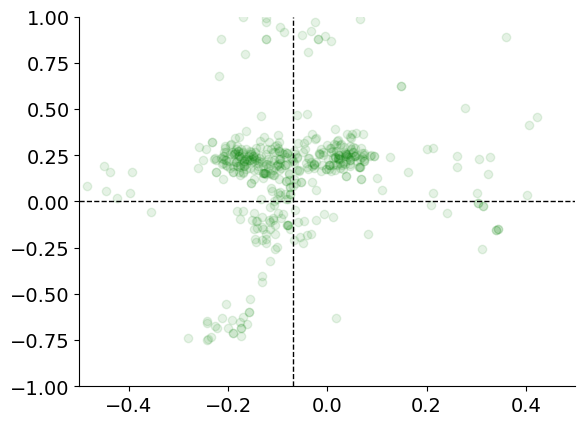

In [367]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

def translate2ScreenX(xcoord):
    return 2*xcoord - 1

def translate2ScreenY(ycoord):
    return -2*ycoord + 1

def set_color(freq_label):
    if freq_label == 'frequent':
        return 'green'
    elif freq_label == 'sometimes':
        return 'orange'
    elif freq_label == 'rare':
        return 'red'
    else:
        return 'gray'

def plot_coordinates(dataframe, column_name="right_gaze_point_on_display_area", color="blue"):
    # extract x and y coordinates from the specified column
    coords_str = dataframe[column_name].apply(eval)  # Convert strings to tuples
    x_values = [float(point[0]) for point in coords_str]
    y_values = [float(point[1]) for point in coords_str]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    # plot the coordinates
    plt.scatter(x_values, y_values, marker='o', label=column_name, color=color, alpha = 0.1)

for csv_file in glob.glob('yaya/*eye*.csv'):
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    if "black" in filename.lower():
        continue
    for name, freq_label in freq_data:
        if name in filename and freq_label == 'frequent':
            color = set_color(freq_label)
            dataframe = pd.read_csv(csv_file)
            dataframe = dataframe[dataframe['left_gaze_point_validity'] != 0]
            plot_coordinates(dataframe, color=color)

# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.xticks([])
# plt.yticks([])
plt.axhline(0., color='black', linestyle='--', linewidth=1)
plt.axvline(-0.07, color='black', linestyle='--', linewidth=1)
plt.ylim(-1, 1)
plt.xlim(-0.5, 0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.show()


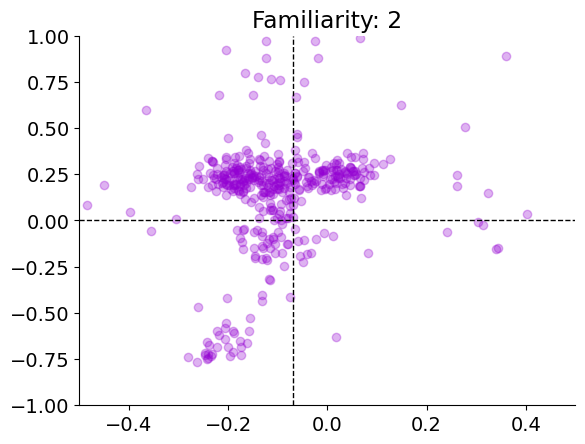

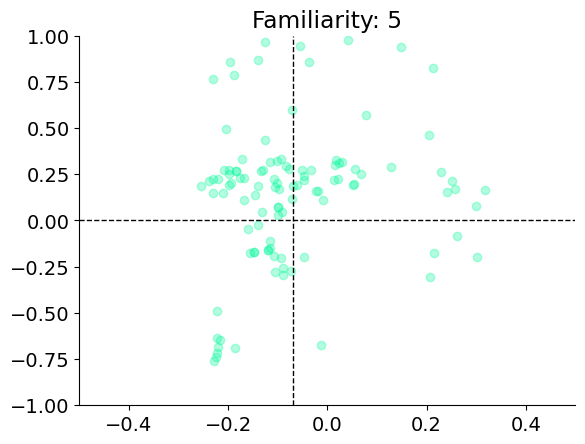

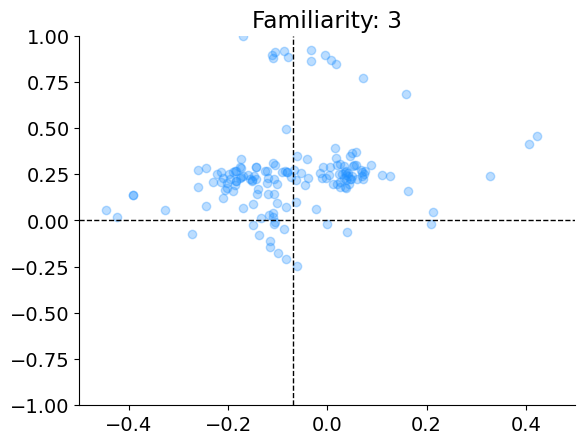

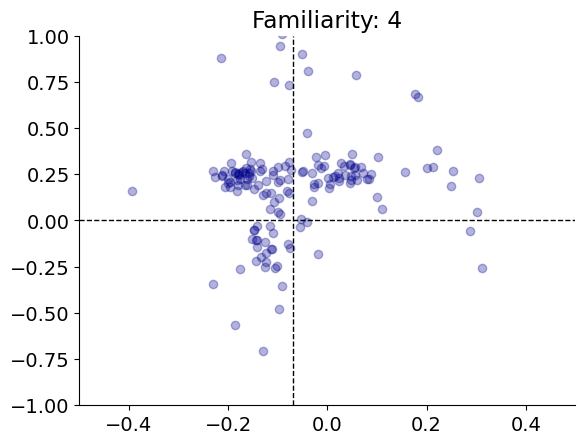

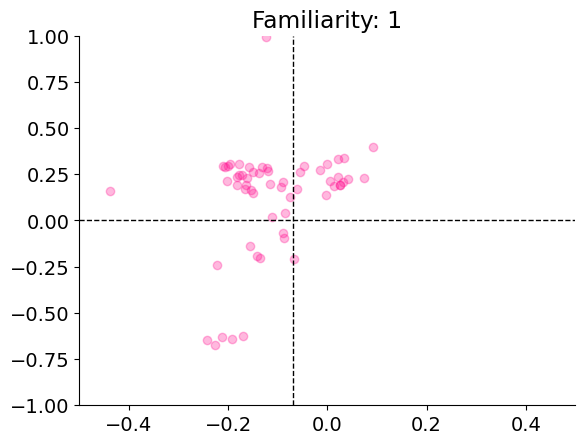

In [371]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt

def set_color(actual_number):
    if actual_number == 1:
        return 'deeppink'
    elif actual_number == 2:
        return 'darkviolet'
    elif actual_number == 3:
        return 'dodgerblue'
    elif actual_number == 4:
        return 'darkblue'
    elif actual_number == 5:
        return 'mediumspringgreen'
    else:
        return 'gray'

def plot_coordinates(dataframe, column_name="right_gaze_point_on_display_area", color="blue"):
    # extract x and y coordinates from the specified column
    coords_str = dataframe[column_name].apply(eval)  # Convert strings to tuples
    x_values = [float(point[0]) for point in coords_str]
    y_values = [float(point[1]) for point in coords_str]
    x_values = list(map(translate2ScreenX, x_values))
    y_values = list(map(translate2ScreenY, y_values))

    # plot the coordinates
    plt.scatter(x_values, y_values, marker='o', label=column_name, color=color, alpha=0.3)

unique_actual_numbers = df['actual number'].unique()

for actual_number in unique_actual_numbers:
    color = set_color(actual_number)
    plt.figure()
    plt.title(f"Familiarity: {actual_number}")
    
    for csv_file in glob.glob('yaya/*eye*.csv'):
        filename = os.path.splitext(os.path.basename(csv_file))[0]
        if "black" in filename.lower() or 'user_data' in filename.lower():
            continue
        
        image_df = df
        
        filename = filename.split(os.path.sep)[-1]
        filename = filename.replace("_eye_tracking", "") 
        filename = filename.replace("man", "stranger_3") 
        try:
            matching_row = image_df[image_df['image'] == filename].iloc[0]
        except:
            continue
        if matching_row['actual number'] == actual_number:
            dataframe = pd.read_csv(csv_file)
            # drop rows where left_gaze_point_validity is 0
            dataframe = dataframe[dataframe['left_gaze_point_validity'] != 0]
            
            plot_coordinates(dataframe, color=color)

# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.xticks([])
# plt.yticks([])
    plt.axhline(0., color='black', linestyle='--', linewidth=1)
    plt.axvline(-0.07, color='black', linestyle='--', linewidth=1)
    plt.ylim(-1, 1)
    plt.xlim(-0.5, 0.5)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()

In [372]:
image_df

,image,user_number,actual number
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4
6,14_morphed_image_zohar_abby_0.25.png,3,2
...,...,...,...
78,74_morphed_image_fei_stranger_3_0.5.png,4,3
79,75_morphed_image_abby_stranger_3_0.75.png,5,4
80,76_morphed_image_stranger_2_abby_0.25.png,5,2
81,77_morphed_image_yuna_abby_0.25.png,3,2


In [373]:
df.columns

Index(['image', 'user_number', 'actual number'], dtype='object')

In [374]:
image_df

,image,user_number,actual number
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4
6,14_morphed_image_zohar_abby_0.25.png,3,2
...,...,...,...
78,74_morphed_image_fei_stranger_3_0.5.png,4,3
79,75_morphed_image_abby_stranger_3_0.75.png,5,4
80,76_morphed_image_stranger_2_abby_0.25.png,5,2
81,77_morphed_image_yuna_abby_0.25.png,3,2


In [375]:
import numpy as np

unique_actual_numbers = image_df['actual number'].unique()

image_df['saccades'] = 0
image_df['average_pupil_size'] = np.nan


for actual_number in unique_actual_numbers:
    color = set_color(actual_number)
    
    for csv_file in glob.glob('yaya/*eye*.csv'):
        filename = os.path.splitext(os.path.basename(csv_file))[0]
        if "black" in filename.lower() or 'user_data' in filename.lower():
            continue
                
        # Find matching row in image_df
        filename = filename.split(os.path.sep)[-1]
        filename = filename.replace("_eye_tracking", "") 
        filename = filename.replace("man", "stranger_3") 
        try:
            matching_row = image_df[image_df['image'] == filename].iloc[0]
        except:
            continue
        if matching_row['actual number'] == actual_number:
            dataframe = pd.read_csv(csv_file)
            # Drop rows where left_gaze_point_validity is 0
            dataframe = dataframe[dataframe['left_gaze_point_validity'] != 0]
            
            num_saccades_list = []
            # extract x and y coordinates from the specified column
            coords_str = dataframe['right_gaze_point_on_display_area'].apply(eval)  # Convert strings to tuples
            x_values = [float(point[0]) for point in coords_str]
            y_values = [float(point[1]) for point in coords_str]
            x_values = list(map(translate2ScreenX, x_values))
            y_values = list(map(translate2ScreenY, y_values))
            
            timestamps = dataframe['system_time_stamp']
            delta_t = np.diff(timestamps)
            delta_x = np.diff(x_values)
            delta_y = np.diff(y_values)
            velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
                
            # Define threshold for velocity to detect saccades
            velocity_threshold = 0.000001
            
            # Detect saccades
            saccade_indices = np.where(velocity > velocity_threshold)[0] + 1  # Shift indices by 1 due to np.diff
            num_saccades = len(saccade_indices)
            
            
            # update matching row saccade count to num_saccades
            image_df.loc[image_df['image'] == filename, 'saccades'] = num_saccades
            
            left_pupil_sizes = dataframe['left_pupil_diameter']
            right_pupil_sizes = dataframe['right_pupil_diameter']
            
            # Calculate average pupil size
            average_pupil_size = (left_pupil_sizes.mean() + right_pupil_sizes.mean()) / 2
            
            # Update image_df with the calculated average pupil size
            image_df.loc[image_df['image'] == filename, 'average_pupil_size'] = average_pupil_size



C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide
  velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide
  velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide
  velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide
  velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide
  velocity = np.sqrt(delta_x**2 + delta_y**2) / delta_t
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\3537801087.py:44: RuntimeWarning: invalid value encountered in divide


In [376]:
image_df.saccades.value_counts()

2    26
0    24
1    17
3     6
4     2
Name: saccades, dtype: int64

In [377]:
image_df

,image,user_number,actual number,saccades,average_pupil_size
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2,1,3.723724
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5,3,3.763547
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3,2,3.915277
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4,2,3.877374
6,14_morphed_image_zohar_abby_0.25.png,3,2,3,3.665105
...,...,...,...,...,...
78,74_morphed_image_fei_stranger_3_0.5.png,4,3,0,4.001904
79,75_morphed_image_abby_stranger_3_0.75.png,5,4,1,3.817597
80,76_morphed_image_stranger_2_abby_0.25.png,5,2,0,4.017060
81,77_morphed_image_yuna_abby_0.25.png,3,2,0,4.120893


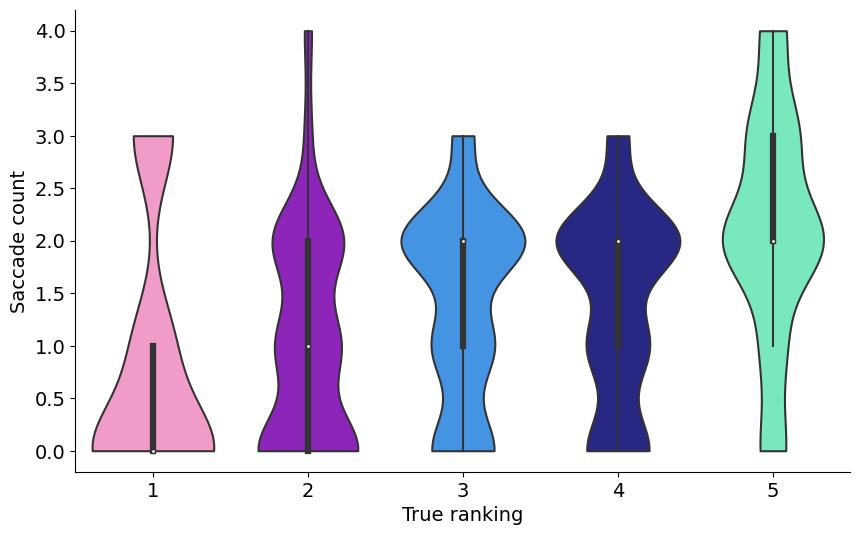

In [378]:
hex_colors = ['#FF8DCA', '#970CD3', '#2A94FF', '#171794', '#66FAC0']

plt.figure(figsize=(10, 6))
sns.violinplot(data=image_df, x='actual number', y='saccades', palette=hex_colors, cut=0, bw=.35)
plt.xlabel('True ranking')
plt.ylabel('Saccade count')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [379]:
image_df

,image,user_number,actual number,saccades,average_pupil_size
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2,1,3.723724
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5,3,3.763547
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3,2,3.915277
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4,2,3.877374
6,14_morphed_image_zohar_abby_0.25.png,3,2,3,3.665105
...,...,...,...,...,...
78,74_morphed_image_fei_stranger_3_0.5.png,4,3,0,4.001904
79,75_morphed_image_abby_stranger_3_0.75.png,5,4,1,3.817597
80,76_morphed_image_stranger_2_abby_0.25.png,5,2,0,4.017060
81,77_morphed_image_yuna_abby_0.25.png,3,2,0,4.120893


In [380]:
fixed_y = 50   # Adjust this value as needed

# Plot circles
plt.figure(figsize=(8, 8))
for i, actual_number in enumerate(unique_actual_numbers):
    # Filter image_df for the specific actual number
    subset_df = image_df[image_df['actual number'] == actual_number]
    
    # Calculate average circle diameter
    average_circle_diameter = subset_df['average_pupil_size'].mean()
    
    print(f"{actual_number}: {average_circle_diameter}")

2: 3.8514542170933317
5: 3.8678489967628766
3: 3.869153536283053
4: 3.8787926627205804
1: 3.954405986901486


<Figure size 800x800 with 0 Axes>

In [381]:
unique_actual_numbers

array([2, 5, 3, 4, 1], dtype=int64)

In [382]:
from scipy.stats import ttest_ind

filtered_image_df = image_df[image_df['actual number'].isin([1, 5])]

actual_1 = filtered_image_df[filtered_image_df['actual number'] == 1]['saccades']
actual_5 = filtered_image_df[filtered_image_df['actual number'] == 5]['saccades']

t_stat, p_value = ttest_ind(actual_1, actual_5)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.9360745804457271
P-value: 0.07676651865381418


In [383]:
from scipy.stats import ttest_ind

filtered_image_df = image_df[image_df['user_number'].isin([1, 5])]

actual_1 = filtered_image_df[filtered_image_df['user_number'] == 1]['saccades']
actual_5 = filtered_image_df[filtered_image_df['user_number'] == 5]['saccades']

t_stat, p_value = ttest_ind(actual_1, actual_5)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -1.6507510332959576
P-value: 0.11037554140337832


In [386]:
eeg_data = pd.read_csv('yaya/71_morphed_image_zohar_annmarie_0.25.png_brain_data.csv')

delta_columns = [col for col in eeg_data.columns if 'delta' in col]
theta_columns = [col for col in eeg_data.columns if 'theta' in col]
alpha_columns = [col for col in eeg_data.columns if 'alpha' in col]
beta_columns = [col for col in eeg_data.columns if 'beta' in col]

eeg_data['delta_power'] = eeg_data[delta_columns].sum(axis=1)
eeg_data['theta_power'] = eeg_data[theta_columns].sum(axis=1)
eeg_data['alpha_power'] = eeg_data[alpha_columns].sum(axis=1)
eeg_data['beta_power'] = eeg_data[beta_columns].sum(axis=1)

average_power = {
    'delta': eeg_data['delta_power'].mean(),
    'theta': eeg_data['theta_power'].mean(),
    'alpha': eeg_data['alpha_power'].mean(),
    'beta': eeg_data['beta_power'].mean(),
}

# find the most dominant brainwave band
most_dominant_band = max(average_power, key=average_power.get)
print("Most dominant brainwave band:", most_dominant_band)

Most dominant brainwave band: beta


In [402]:
len(x_values)

71

In [401]:
len(averages_dict['delta'])

79

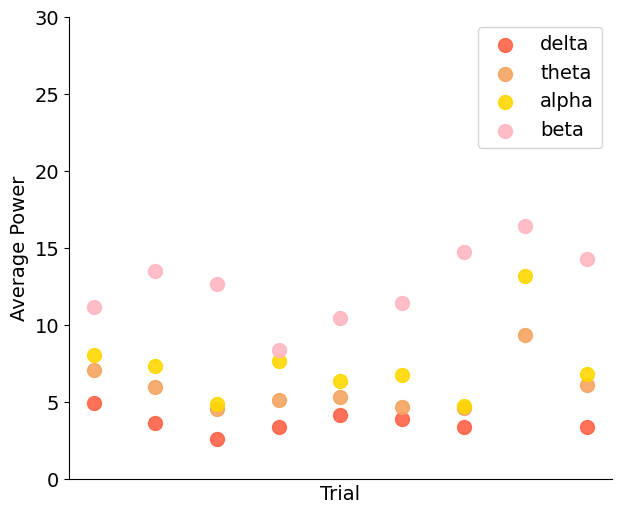

In [443]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Initialize dictionaries to store averages and actual numbers
averages_dict = {'delta': [], 'theta': [], 'alpha': [], 'beta': []}

# Iterate through CSV files
for csv_file in glob.glob('yaya/*brain*.csv'):
    # Read CSV file
    eeg_data = pd.read_csv(csv_file)
    
    # Extract actual number from file name
    filename = os.path.splitext(os.path.basename(csv_file))[0]
    actual_number = filename.split('_')[-1]
    
    # Store averages and actual number in dictionary
    filename = filename.split(os.path.sep)[-1]
    filename = filename.replace("_brain_data", "") 
    filename = filename.replace("man", "stranger_3") 
    try:
        matching_row = image_df[image_df['image'] == filename].iloc[0]
    except:
        continue
    if matching_row['actual number'] != 5:
        continue
    
    averages_dict['delta'].append(delta_average)
    averages_dict['theta'].append(theta_average)
    averages_dict['alpha'].append(alpha_average)
    averages_dict['beta'].append(beta_average)
    
    # Calculate average power within each brainwave band
    delta_average = eeg_data.filter(regex='delta').mean().mean()
    theta_average = eeg_data.filter(regex='theta').mean().mean()
    alpha_average = eeg_data.filter(regex='alpha').mean().mean()
    beta_average = eeg_data.filter(regex='beta').mean().mean()
    

# Create scatter plot
plt.figure(figsize=(7, 6))
for band, color in zip(['delta', 'theta', 'alpha', 'beta'], ['tomato', 'sandybrown', 'gold', 'lightpink']):
    x_values = np.arange(len(averages_dict['delta']))
    plt.scatter(x_values, averages_dict[band], color=color, alpha=0.9, label=band, s=100)

plt.ylim(0, 30)
plt.xlabel('Trial')
plt.ylabel('Average Power')
plt.xticks([])
# plt.title('Power Across Brainwave Bands')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()


In [476]:
import os
import pandas as pd

csv_files = [file for file in os.listdir('yaya/') if file.endswith('.csv') and 'black' not in file and 'brain' in file]

smallest_length = float('inf')
smallest_file = None
for file in csv_files:
    df = pd.read_csv('yaya/' + file)
    if len(df) < smallest_length:
        smallest_length = len(df)
        smallest_file = file

df_smallest = pd.read_csv('yaya/' + smallest_file)
num_columns = len(df_smallest.columns)

new_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv('yaya/' + file)
    
    df = df[:smallest_length]
    
    flattened_row = df.values.flatten()
    
    row_with_file = [file] + list(flattened_row)
    
    new_df = new_df.append(pd.Series(row_with_file), ignore_index=True)

new_df.head()

C:\Users\catra\AppData\Local\Temp\ipykernel_35424\2742004111.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(row_with_file), ignore_index=True)
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\2742004111.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(row_with_file), ignore_index=True)
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\2742004111.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(pd.Series(row_with_file), ignore_index=True)
C:\Users\catra\AppData\Local\Temp\ipykernel_35424\2742004111.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,10_morphed_image_stranger_2_annmarie_0.25.png_...,0.209923,0.272089,4.039156,6.847071,3.846585,1.234682,8.852148,12.490117,6.642060,...,9.635277,8.743542,2.917655,9.699942,5.001500,3.430393,11.153057,20.732428,4.269207,739850.336907
1,11_morphed_image_stranger_2_man_0.75.png_brain...,2.934314,3.018011,1.736980,2.199831,6.184181,5.575854,7.300923,6.846912,2.814708,...,8.641857,3.043844,2.902566,6.628869,7.325352,2.539122,12.363099,26.285605,13.196604,739858.335022
2,12_morphed_image_stranger_1_annmarie_0.5.png_b...,1.244519,6.453010,7.046107,4.895324,5.847706,4.645078,7.324153,10.538153,2.868481,...,18.592424,10.501809,4.064563,12.924529,10.977694,8.408346,10.654791,23.656010,14.830967,739865.331692
3,13_morphed_image_yuna_stranger_1_0.25.png_brai...,2.645112,1.829742,6.452274,6.696039,3.241573,3.357958,7.438100,12.369283,3.668482,...,13.069048,12.090617,4.865775,8.493463,1.557878,0.696224,2.024271,9.061560,5.642187,739873.330177
4,14_morphed_image_zohar_abby_0.25.png_brain_dat...,0.467704,1.434436,3.678276,3.440024,0.633762,2.578684,9.143078,9.366884,5.122401,...,13.640433,11.444458,2.081415,8.130444,9.053217,7.660923,14.955032,26.058382,11.339412,739880.327419


In [487]:
new_df.rename(columns={0: 'image'}, inplace=True)
new_df['image'] = new_df['image'].str.split('.png').str[0] + '.png'
new_df['image'] = new_df['image'].str.replace("man", "stranger_3")
new_df

,image,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,10_morphed_image_stranger_2_annmarie_0.25.png,0.209923,0.272089,4.039156,6.847071,3.846585,1.234682,8.852148,12.490117,6.642060,...,9.635277,8.743542,2.917655,9.699942,5.001500,3.430393,11.153057,20.732428,4.269207,739850.336907
1,11_morphed_image_stranger_2_stranger_3_0.75.png,2.934314,3.018011,1.736980,2.199831,6.184181,5.575854,7.300923,6.846912,2.814708,...,8.641857,3.043844,2.902566,6.628869,7.325352,2.539122,12.363099,26.285605,13.196604,739858.335022
2,12_morphed_image_stranger_1_annmarie_0.5.png,1.244519,6.453010,7.046107,4.895324,5.847706,4.645078,7.324153,10.538153,2.868481,...,18.592424,10.501809,4.064563,12.924529,10.977694,8.408346,10.654791,23.656010,14.830967,739865.331692
3,13_morphed_image_yuna_stranger_1_0.25.png,2.645112,1.829742,6.452274,6.696039,3.241573,3.357958,7.438100,12.369283,3.668482,...,13.069048,12.090617,4.865775,8.493463,1.557878,0.696224,2.024271,9.061560,5.642187,739873.330177
4,14_morphed_image_zohar_abby_0.25.png,0.467704,1.434436,3.678276,3.440024,0.633762,2.578684,9.143078,9.366884,5.122401,...,13.640433,11.444458,2.081415,8.130444,9.053217,7.660923,14.955032,26.058382,11.339412,739880.327419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,70_cropped_zohar.jpeg_brain_data.csv.png,8.155732,14.746668,16.231856,5.298199,9.726018,9.361451,13.311297,10.483069,33.449082,...,17.639694,6.668596,1.602440,7.146589,9.037403,4.539326,9.295484,16.758101,11.055619,740579.006294
67,71_morphed_image_zohar_annmarie_0.25.png,0.568313,0.655376,1.743836,2.220457,0.427209,6.547837,5.334152,1.311052,3.719136,...,12.554118,10.583539,8.945533,16.815900,15.776058,6.500005,2.886213,19.204263,6.099835,740590.987455
68,72_morphed_image_stranger_2_stranger_1_0.75.png,3.416233,8.760293,8.576328,9.288381,6.956036,6.250635,2.116717,5.832581,8.858737,...,32.120659,32.383026,14.935133,13.510681,4.444009,10.896818,2.247322,6.365121,0.736146,740571.733752
69,73_morphed_image_zohar_stranger_3_0.75.png,0.665357,3.359469,16.500647,18.769354,1.138699,1.257385,5.724200,4.058015,1.494680,...,5.989892,6.449659,10.088747,15.636396,11.433192,4.907536,5.358561,20.627659,10.564794,740634.716216


In [490]:
merged_df = pd.merge(new_df, image_df[['image', 'actual number']], on='image', how='left')

In [489]:
image_df

,image,user_number,actual number,saccades,average_pupil_size
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2,1,3.723724
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5,3,3.763547
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3,2,3.915277
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4,2,3.877374
6,14_morphed_image_zohar_abby_0.25.png,3,2,3,3.665105
...,...,...,...,...,...
78,74_morphed_image_fei_stranger_3_0.5.png,4,3,0,4.001904
79,75_morphed_image_abby_stranger_3_0.75.png,5,4,1,3.817597
80,76_morphed_image_stranger_2_abby_0.25.png,5,2,0,4.017060
81,77_morphed_image_yuna_abby_0.25.png,3,2,0,4.120893


In [491]:
merged_df

,image,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,actual number
0,10_morphed_image_stranger_2_annmarie_0.25.png,0.209923,0.272089,4.039156,6.847071,3.846585,1.234682,8.852148,12.490117,6.642060,...,8.743542,2.917655,9.699942,5.001500,3.430393,11.153057,20.732428,4.269207,739850.336907,2.0
1,11_morphed_image_stranger_2_stranger_3_0.75.png,2.934314,3.018011,1.736980,2.199831,6.184181,5.575854,7.300923,6.846912,2.814708,...,3.043844,2.902566,6.628869,7.325352,2.539122,12.363099,26.285605,13.196604,739858.335022,5.0
2,12_morphed_image_stranger_1_annmarie_0.5.png,1.244519,6.453010,7.046107,4.895324,5.847706,4.645078,7.324153,10.538153,2.868481,...,10.501809,4.064563,12.924529,10.977694,8.408346,10.654791,23.656010,14.830967,739865.331692,3.0
3,13_morphed_image_yuna_stranger_1_0.25.png,2.645112,1.829742,6.452274,6.696039,3.241573,3.357958,7.438100,12.369283,3.668482,...,12.090617,4.865775,8.493463,1.557878,0.696224,2.024271,9.061560,5.642187,739873.330177,4.0
4,14_morphed_image_zohar_abby_0.25.png,0.467704,1.434436,3.678276,3.440024,0.633762,2.578684,9.143078,9.366884,5.122401,...,11.444458,2.081415,8.130444,9.053217,7.660923,14.955032,26.058382,11.339412,739880.327419,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,70_cropped_zohar.jpeg_brain_data.csv.png,8.155732,14.746668,16.231856,5.298199,9.726018,9.361451,13.311297,10.483069,33.449082,...,6.668596,1.602440,7.146589,9.037403,4.539326,9.295484,16.758101,11.055619,740579.006294,NaN
67,71_morphed_image_zohar_annmarie_0.25.png,0.568313,0.655376,1.743836,2.220457,0.427209,6.547837,5.334152,1.311052,3.719136,...,10.583539,8.945533,16.815900,15.776058,6.500005,2.886213,19.204263,6.099835,740590.987455,2.0
68,72_morphed_image_stranger_2_stranger_1_0.75.png,3.416233,8.760293,8.576328,9.288381,6.956036,6.250635,2.116717,5.832581,8.858737,...,32.383026,14.935133,13.510681,4.444009,10.896818,2.247322,6.365121,0.736146,740571.733752,5.0
69,73_morphed_image_zohar_stranger_3_0.75.png,0.665357,3.359469,16.500647,18.769354,1.138699,1.257385,5.724200,4.058015,1.494680,...,6.449659,10.088747,15.636396,11.433192,4.907536,5.358561,20.627659,10.564794,740634.716216,4.0


In [494]:
merged_df = merged_df.dropna()


In [508]:
merged_df['actual number'].value_counts()

2.0    33
3.0    13
4.0    12
5.0     9
Name: actual number, dtype: int64

In [501]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 70
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              67 non-null     float64
 1   2              67 non-null     float64
 2   3              67 non-null     float64
 3   4              67 non-null     float64
 4   5              67 non-null     float64
 5   6              67 non-null     float64
 6   7              67 non-null     float64
 7   8              67 non-null     float64
 8   9              67 non-null     float64
 9   10             67 non-null     float64
 10  11             67 non-null     float64
 11  12             67 non-null     float64
 12  13             67 non-null     float64
 13  14             67 non-null     float64
 14  15             67 non-null     float64
 15  16             67 non-null     float64
 16  17             67 non-null     float64
 17  18             67 non-null     float64
 18  19          

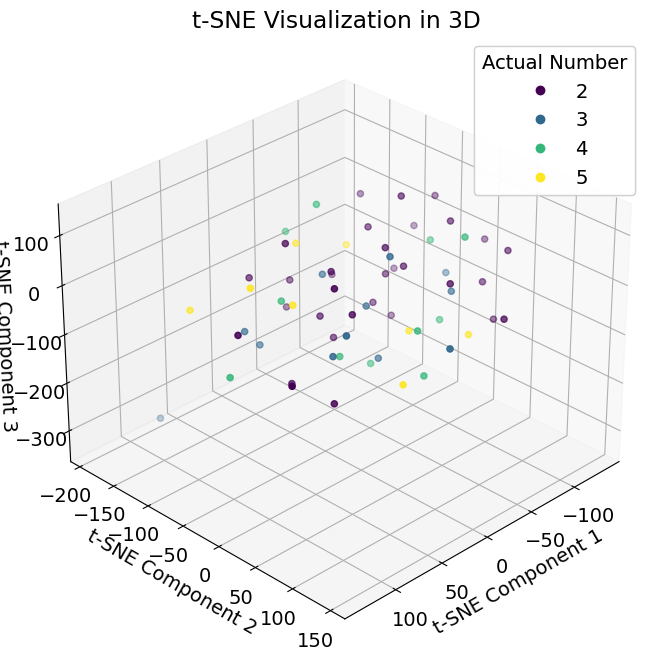

In [531]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


data = new_df.drop(columns=['image'])
data.columns = data.columns.astype(str)
data = data.select_dtypes(exclude=['object'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# perform t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

tsne_df = pd.DataFrame(data=tsne_components, columns=['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3'])

final_df = pd.concat([tsne_df, new_df['actual number']], axis=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors_hex = ['#FF5733', '#33FF57', '#3357FF' , '#3357FF' ]
scatter = ax.scatter(final_df['t-SNE Component 1'], final_df['t-SNE Component 2'], final_df['t-SNE Component 3'], c=final_df['actual number'], cmap='viridis')

# rotate plot
ax.view_init(elev=30, azim=45)  # adjust the elevation (elev) and azimuth (azim) angles

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('t-SNE Visualization in 3D')

legend = ax.legend(*scatter.legend_elements(), title='Actual Number')
ax.add_artist(legend)

plt.show()


In [532]:
final_df = final_df.dropna()
final_df

,t-SNE Component 1,t-SNE Component 2,t-SNE Component 3,actual number
0,123.268204,-8.629741,24.637506,2.0
1,103.776199,-16.910723,92.662117,5.0
2,78.328720,76.886360,45.657188,3.0
3,8.318844,92.744171,-87.846893,4.0
4,48.057095,-92.528107,8.428182,2.0
...,...,...,...,...
59,129.274277,70.540504,-8.683633,2.0
60,24.477322,144.336655,20.566879,3.0
63,-1.906906,-106.136627,-106.464050,2.0
64,-13.442538,46.722755,-52.604397,5.0


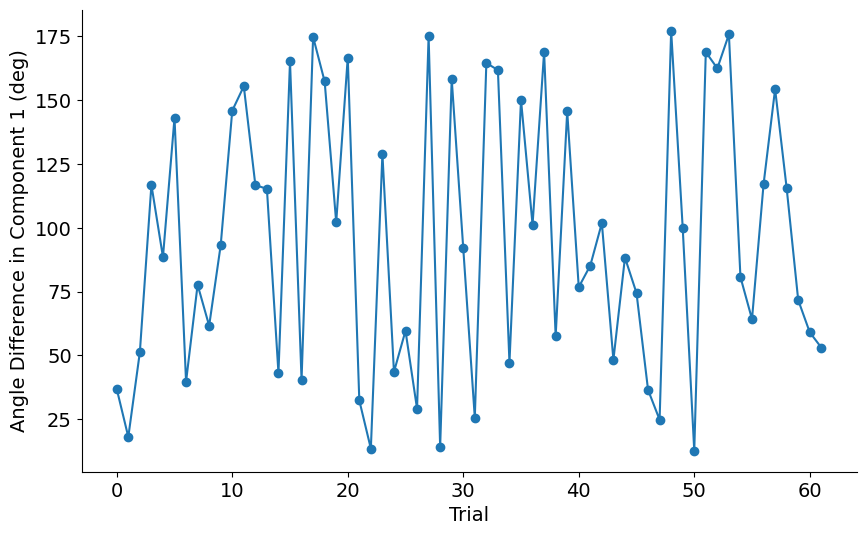

In [548]:
import math
# filtered_df = final_df[final_df['actual number'] == 2.0] 

tsne_component_1 = final_df['t-SNE Component 1']
angle_diff = np.abs(np.arctan2(np.sin(np.diff(tsne_component_1)), np.cos(np.diff(tsne_component_1))))
angle_diff_deg = np.degrees(angle_diff)

# plot the angle difference
plt.figure(figsize=(10, 6))
plt.plot(angle_diff_deg, marker='o', linestyle='-')
plt.xlabel('Trial')
plt.ylabel('Angle Difference in Component 1 (deg)')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [554]:
image_df['actual number'] -= 1

In [587]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

df = image_df
X = df[['saccades', 'average_pupil_size']]
y = df['actual number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=143)

model = XGBClassifier(n_estimators=1, learning_rate=0.01)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.3111111111111111


0.7


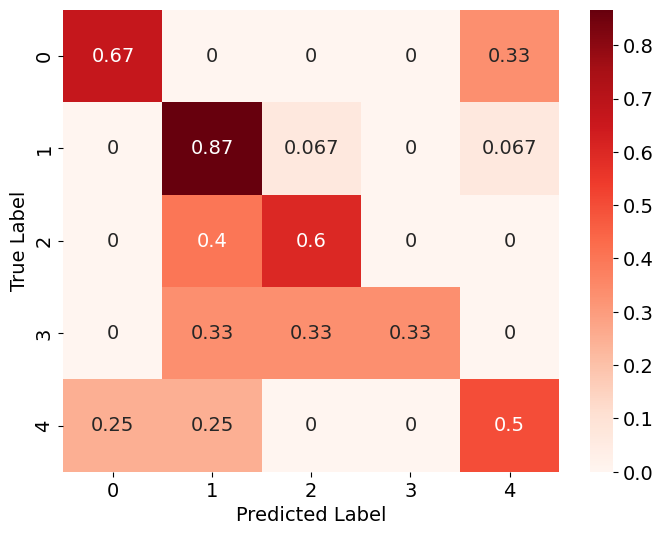

In [592]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_norm, annot=True, cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('yaya/image_user_data.csv')

df['image'] = df['image'].str.replace('man', 'stranger_3')

def determine_actual_number(image_name):
    if 'stranger' in image_name:
        if image_name.count('stranger') >= 2 or 'cropped' in image_name:
            return 5
        elif 'stranger_' in image_name:
            parts = image_name.split('_')
            if len(parts) >= 4:
                if parts[parts.index('stranger') + 2] == '0.25.png':
                    return 4
                elif parts[parts.index('stranger') + 2] == '0.75.png':
                    return 4
                elif '0.5.png' in image_name and image_name.count('stranger') == 1:
                    return 3
    elif 'cropped' in image_name:
        return 1
    return 2

df['actual number'] = df['image'].apply(determine_actual_number)
df.head(50)

,image,user_number,actual number
0,0_black_image.png,2,2
1,10_black_image.png,2,2
2,10_morphed_image_stranger_2_annmarie_0.25.png,5,2
3,11_morphed_image_stranger_2_stranger_3_0.75.png,5,5
4,12_morphed_image_stranger_1_annmarie_0.5.png,2,3
5,13_morphed_image_yuna_stranger_1_0.25.png,2,4
6,14_morphed_image_zohar_abby_0.25.png,3,2
7,15_morphed_image_stranger_2_stranger_3_0.25.png,5,5
8,16_morphed_image_fei_stranger_3_0.25.png,2,4
9,17_morphed_image_yuna_zohar_0.5.png,3,2


In [ ]:
df = df[~df['image'].str.contains('black')]
len(df)

75

In [ ]:
df['actual number'].value_counts()

2    35
3    13
4    13
5     9
1     5
Name: actual number, dtype: int64

In [ ]:
for i, actual_number in enumerate(unique_actual_numbers):
    subset_df = image_df[image_df['actual number'] == actual_number]
    average_circle_diameter = subset_df['average_pupil_size'].mean()
    
    print(f"{actual_number}: {average_circle_diameter}")

2: 3.8514542170933317
5: 3.8678489967628766
3: 3.869153536283053
4: 3.8787926627205804
1: 3.954405986901486


<Figure size 800x800 with 0 Axes>